In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data= pd.read_csv('dailyclimate.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.head()

,Unnamed: 0,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


In [6]:
print(data.columns)


Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m'],
      dtype='object')


Missing values in Precip: 1

Precipitation Statistics:
count    215320.000000
mean          2.389736
std           6.335764
min           0.000000
25%           0.000000
50%           0.030000
75%           1.670000
max         177.360000
Name: Precip, dtype: float64


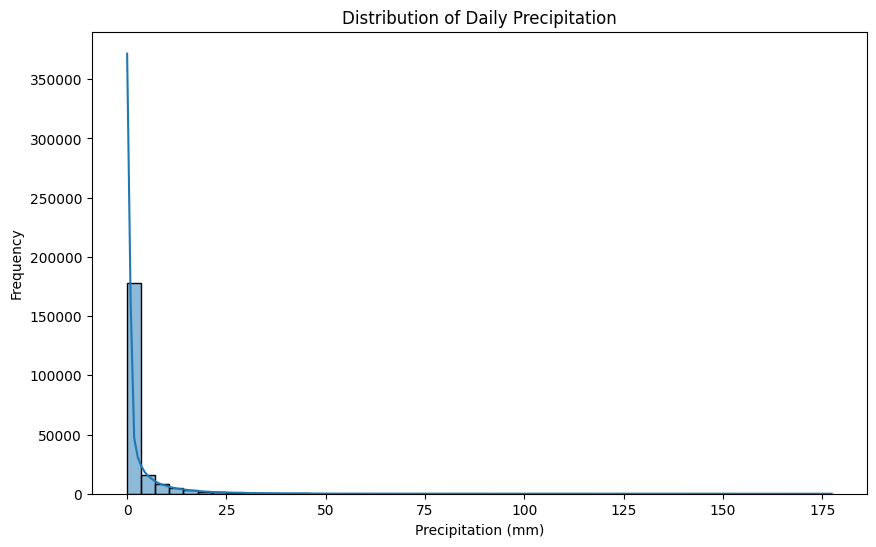

In [7]:
# Check for missing values in precipitation data
print("Missing values in Precip:", data['Precip'].isnull().sum())

# Calculate summary statistics
precip_stats = data['Precip'].describe()
print("\nPrecipitation Statistics:")
print(precip_stats)

# Visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Precip'], bins=50, kde=True)
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Threshold calculations based on percentiles
thresholds = {
    'Light Rain': data['Precip'].quantile(0.75),  # 75th percentile: 1.87 mm
    'Moderate Rain': data['Precip'].quantile(0.90), # 90th percentile
    'Heavy Rain': data['Precip'].quantile(0.95),    # 95th percentile
    'Extreme Rain': data['Precip'].quantile(0.99)   # 99th percentile
}

In [9]:
# Calculate seasonal patterns
data['Month'] = pd.to_datetime(data['Date']).dt.month
monthly_stats = data.groupby('Month')['Precip'].agg(['mean', 'max', 'std'])

# Identify extreme events
extreme_events = data[data['Precip'] > data['Precip'].quantile(0.99)]

# Calculate return periods
def calculate_return_period(data, threshold):
    events_per_year = (data['Precip'] > threshold).sum() / (len(data)/365)
    return 1/events_per_year if events_per_year > 0 else float('inf')

<ipython-input-10-248a0b26bd24>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Date'>

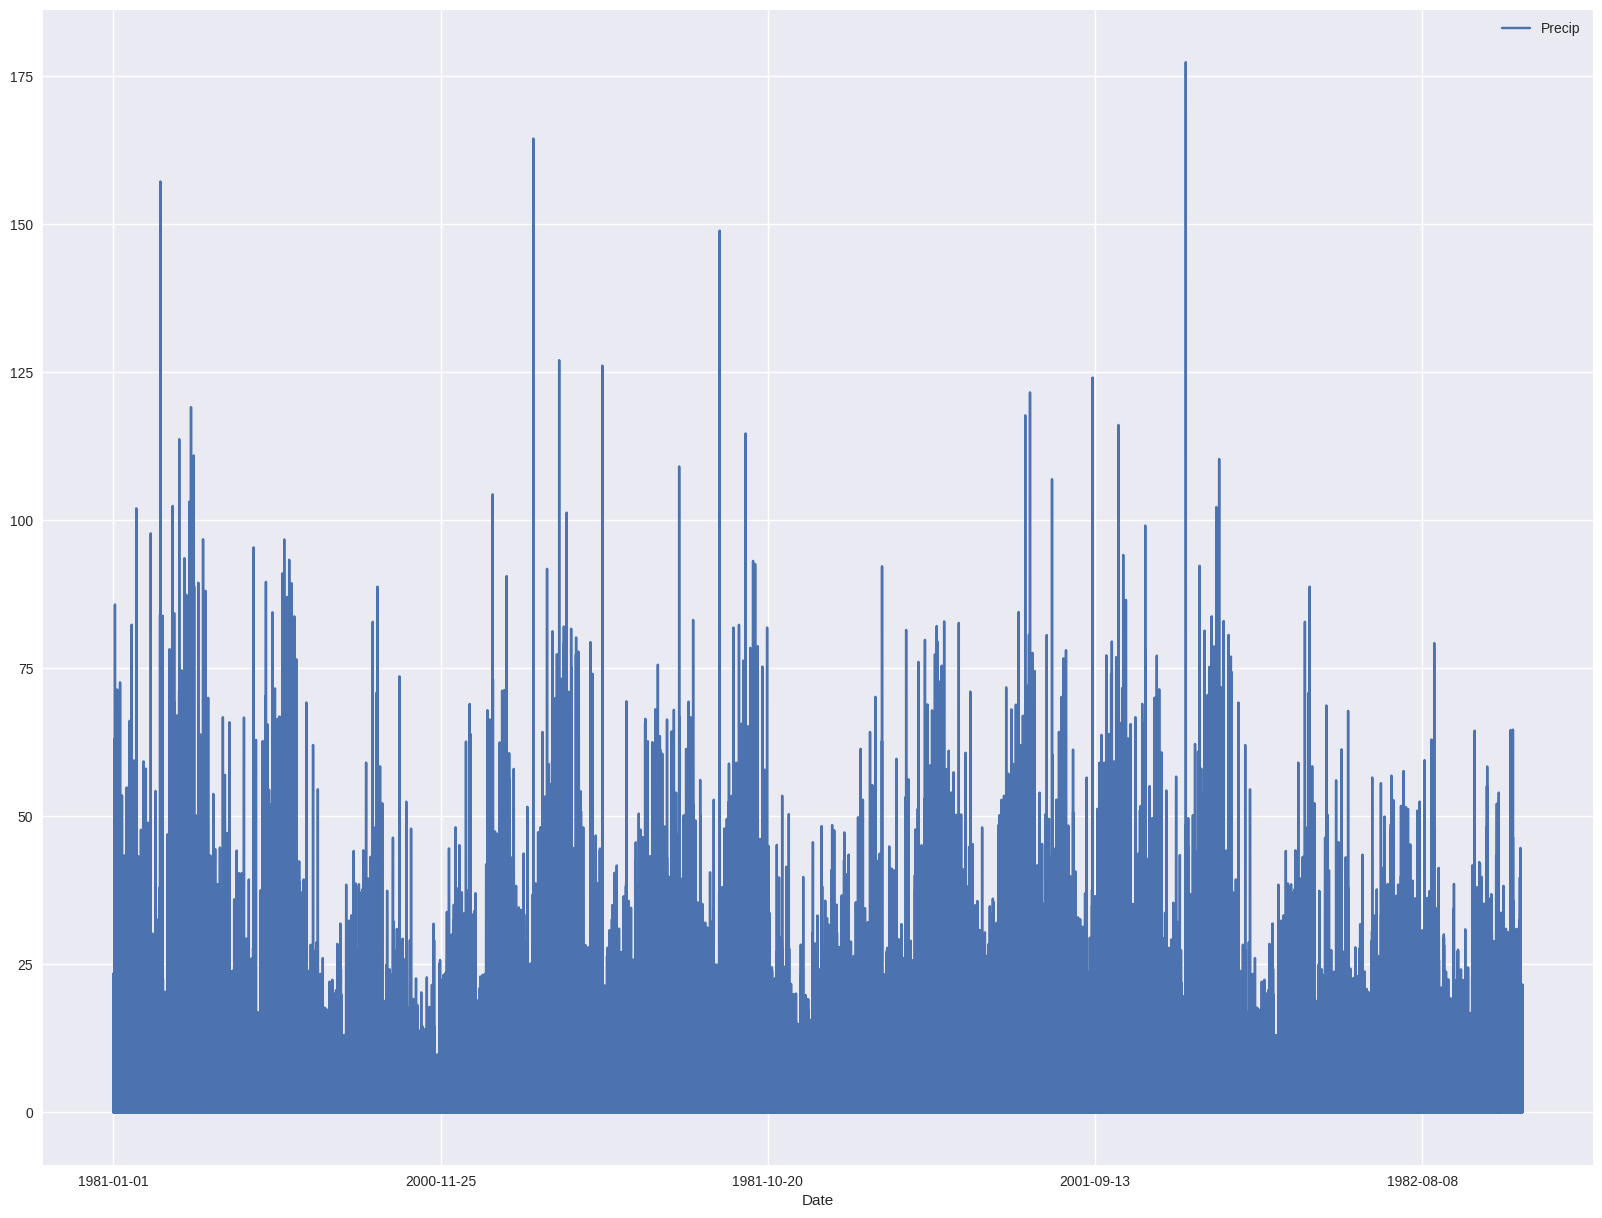

In [10]:
from scipy import stats
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()
data.plot(kind='line', x='Date', y='Precip', ax=ax)

Text(0, 0.5, 'Frequency')

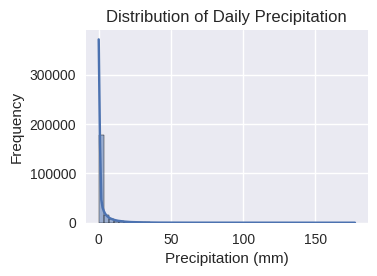

In [11]:
# 1. Precipitation Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Precip'], bins=50, kde=True)
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Precipitation (mm)')

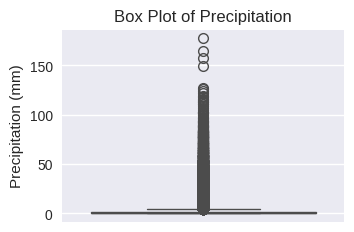

In [12]:
# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(y=data['Precip'])
plt.title('Box Plot of Precipitation')
plt.ylabel('Precipitation (mm)')

Text(0, 0.5, 'Threshold Value (mm)')

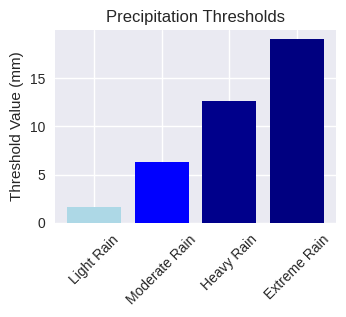

In [13]:
# 3. Calculate and visualize thresholds
thresholds = {
    'Light Rain': data['Precip'].quantile(0.75),      # 75th percentile
    'Moderate Rain': data['Precip'].std(),            # 1 std dev
    'Heavy Rain': 2 * data['Precip'].std(),           # 2 std dev
    'Extreme Rain': 3 * data['Precip'].std()          # 3 std dev
}

# Create bar plot for thresholds
plt.subplot(2, 2, 3)
colors = ['lightblue', 'blue', 'darkblue', 'navy']
plt.bar(thresholds.keys(), thresholds.values(), color=colors)
plt.title('Precipitation Thresholds')
plt.xticks(rotation=45)
plt.ylabel('Threshold Value (mm)')


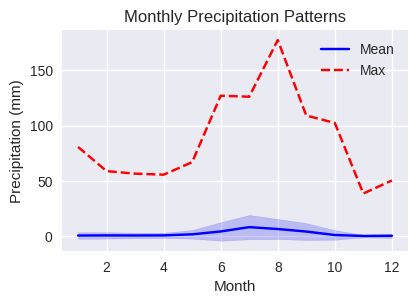

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

monthly_stats = data.groupby('Month')['Precip'].agg(['mean', 'max', 'std']).reset_index()

plt.subplot(2, 2, 4)
plt.plot(monthly_stats['Month'], monthly_stats['mean'], 'b-', label='Mean')
plt.plot(monthly_stats['Month'], monthly_stats['max'], 'r--', label='Max')
plt.fill_between(monthly_stats['Month'],
                monthly_stats['mean'] - monthly_stats['std'],
                monthly_stats['mean'] + monthly_stats['std'],
                alpha=0.2, color='blue')
plt.title('Monthly Precipitation Patterns')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# 4. Monthly Analysis
# Convert date to datetime if it's not already

# Print statistical summary
print("\nPrecipitation Thresholds:")
for level, value in thresholds.items():
    print(f"{level}: {value:.2f} mm")

print("\nKey Statistics:")
print(data['Precip'].describe())

# Calculate percentage of days exceeding each threshold
print("\nPercentage of Days Exceeding Thresholds:")
for level, value in thresholds.items():
    percentage = (data['Precip'] > value).mean() * 100
    print(f"{level}: {percentage:.2f}%")



Precipitation Thresholds:
Light Rain: 1.67 mm
Moderate Rain: 6.34 mm
Heavy Rain: 12.67 mm
Extreme Rain: 19.01 mm

Key Statistics:
count    215320.000000
mean          2.389736
std           6.335764
min           0.000000
25%           0.000000
50%           0.030000
75%           1.670000
max         177.360000
Name: Precip, dtype: float64

Percentage of Days Exceeding Thresholds:
Light Rain: 24.94%
Moderate Rain: 11.20%
Heavy Rain: 5.14%
Extreme Rain: 2.70%


In [16]:
# Additional Analysis: Return Periods
def calculate_return_period(data, threshold):
    events_per_year = (data['Precip'] > threshold).sum() / (len(data)/365)
    return 1/events_per_year if events_per_year > 0 else float('inf')

print("\nReturn Periods (years):")
for level, value in thresholds.items():
    return_period = calculate_return_period(data, value)
    print(f"{level}: {return_period:.2f} years")

# Create a risk assessment function
def assess_flood_risk(precipitation):
    if precipitation <= thresholds['Light Rain']:
        return 'Low Risk'
    elif precipitation <= thresholds['Moderate Rain']:
        return 'Moderate Risk'
    elif precipitation <= thresholds['Heavy Rain']:
        return 'High Risk'
    else:
        return 'Extreme Risk'

# Add risk assessment to the dataset
data['Risk_Level'] = data['Precip'].apply(assess_flood_risk)

# Print risk level distribution
print("\nRisk Level Distribution:")
print(data['Risk_Level'].value_counts(normalize=True) * 100)

# Optional: Save the analysis to a CSV file
analysis_results = pd.DataFrame({
    'Threshold_Level': list(thresholds.keys()),
    'Threshold_Value': list(thresholds.values()),
    'Exceedance_Percentage': [(data['Precip'] > value).mean() * 100 for value in thresholds.values()],
    'Return_Period': [calculate_return_period(data, value) for value in thresholds.values()]
})

analysis_results.to_csv('precipitation_analysis.csv', index=False)


Return Periods (years):
Light Rain: 0.01 years
Moderate Rain: 0.02 years
Heavy Rain: 0.05 years
Extreme Rain: 0.10 years

Risk Level Distribution:
Risk_Level
Low Risk         75.061420
Moderate Risk    13.733449
High Risk         6.066756
Extreme Risk      5.138375
Name: proportion, dtype: float64


In [17]:
def flood_risk_assessment(precipitation, antecedent_rainfall, thresholds):
    # Current rainfall intensity
    current_risk = 0
    if precipitation > thresholds['Extreme Rain']:
        current_risk = 3  # High risk
    elif precipitation > thresholds['Heavy Rain']:
        current_risk = 2  # Moderate risk
    elif precipitation > thresholds['Light Rain']:
        current_risk = 1  # Low risk

    # Consider antecedent rainfall (previous 3-5 days)
    soil_saturation = sum(antecedent_rainfall)
    if soil_saturation > thresholds['Heavy Rain'] * 3:
        current_risk += 1

    return current_risk

In [18]:
# Example implementation
def flood_alert_system(data):
    alerts = []
    window_size = 3  # Consider previous 3 days

    for i in range(window_size, len(data)):
        antecedent_rainfall = data['Precip'].iloc[i-window_size:i]
        current_rain = data['Precip'].iloc[i]

        risk_level = flood_risk_assessment(current_rain, antecedent_rainfall, thresholds)
        alerts.append(risk_level)

    return alerts

In [19]:
# Define critical parameters
flood_parameters = {
    'intensity_threshold': thresholds['Heavy Rain'],
    'duration_threshold': 24,  # hours
    'accumulation_threshold': thresholds['Heavy Rain'] * 3,
    'soil_saturation_factor': 0.8
}

# Real-time monitoring function
def monitor_flood_conditions(current_data, historical_data):
    """
    Parameters:
    current_data: Current precipitation readings
    historical_data: Past precipitation data

    Returns:
    risk_level: Integer (0-3)
    alert_message: String
    """

    # Calculate intensity
    current_intensity = current_data['Precip'].values[-1]

    # Calculate accumulation (last 24 hours)
    recent_accumulation = current_data['Precip'].rolling(24).sum().values[-1]

    # Check historical patterns
    historical_percentile = stats.percentileofscore(historical_data['Precip'],
                                                  current_intensity)

    risk_level = 0
    alert_message = "Normal conditions"

    # Risk assessment logic
    if current_intensity > flood_parameters['intensity_threshold']:
        risk_level += 1
        alert_message = "High intensity rainfall detected"

    if recent_accumulation > flood_parameters['accumulation_threshold']:
        risk_level += 1
        alert_message += "; Significant accumulation"

    if historical_percentile > 95:
        risk_level += 1
        alert_message += "; Exceptional event"

    return risk_level, alert_message

In [20]:
# Example of a complete monitoring system
class FloodMonitoringSystem:
    def __init__(self, historical_data, thresholds):
        self.historical_data = historical_data
        self.thresholds = thresholds
        self.current_status = 'Normal'

    def update(self, new_data):
        # 1. Intensity Analysis
        intensity_risk = new_data['Precip'] > self.thresholds['Heavy Rain']

        # 2. Duration Analysis
        duration_risk = new_data['Precip'].rolling(24).sum() > \
                       self.thresholds['Heavy Rain'] * 24

        # 3. Historical Comparison
        historical_risk = new_data['Precip'] > \
                         self.historical_data['Precip'].quantile(0.95)

        # 4. Combined Risk Assessment
        risk_level = intensity_risk.astype(int) + \
                    duration_risk.astype(int) + \
                    historical_risk.astype(int)

        return {
            'risk_level': risk_level,
            'intensity_alert': intensity_risk,
            'duration_alert': duration_risk,
            'historical_comparison': historical_risk
        }

In [21]:
def identify_flood_patterns(data):
    # Seasonal patterns
    monthly_risks = data.groupby(data['Date'].dt.month)['Precip'].agg([
        'mean', 'std', 'max'
    ])

    # Identify high-risk periods
    high_risk_months = monthly_risks[
        monthly_risks['mean'] > monthly_risks['mean'].mean() +
        monthly_risks['std']
    ].index

    return high_risk_months

In [22]:
def comprehensive_flood_risk(data):
    # Combine precipitation with other factors
    risk_score = (
        0.4 * normalize(data['Precip']) +
        0.2 * normalize(data['Humidity_2m']) +
        0.2 * normalize(data['WindSpeed_10m']) +
        0.2 * normalize(data['EarthSkinTemp'])
    )
    return risk_score

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

class FloodMonitoringSystem:
    def __init__(self, thresholds):
        self.thresholds = thresholds
        self.current_data = None
        self.historical_data = pd.DataFrame()

    def process_new_data(self, new_data):
        """Process incoming sensor data"""
        self.current_data = new_data
        self.historical_data = self.historical_data.append(new_data)

        return self.generate_dashboard_data()

    def generate_dashboard_data(self):
        """Generate data for dashboard display"""
        return {
            'current_conditions': self.get_current_conditions(),
            'hourly_data': self.get_hourly_data(),
            'risk_assessment': self.assess_risk(),
            'alerts': self.generate_alerts()
        }

In [24]:
def get_current_conditions(self):
        """Get current meteorological conditions"""
        return {
            'precipitation': self.current_data['Precip'],
            'humidity': self.current_data['Humidity_2m'],
            'windSpeed': self.current_data['WindSpeed_10m'],
            'temperature': self.current_data['Temp_2m'],
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }

In [25]:
def get_hourly_data(self):
        """Get hourly aggregated data for charts"""
        return self.historical_data.resample('H').agg({
            'Precip': 'sum',
            'Humidity_2m': 'mean',
            'WindSpeed_10m': 'mean',
            'Temp_2m': 'mean'
        }).last('24H')

In [26]:
def assess_risk(self):
        """Assess current flood risk level"""
        current_precip = self.current_data['Precip']

        if current_precip > self.thresholds['Extreme Rain']:
            return {'level': 'Critical', 'score': 4}
        elif current_precip > self.thresholds['Heavy Rain']:
            return {'level': 'High', 'score': 3}
        elif current_precip > self.thresholds['Moderate Rain']:
            return {'level': 'Moderate', 'score': 2}
        else:
            return {'level': 'Low', 'score': 1}

In [27]:
    def generate_alerts(self):
        """Generate alert messages based on conditions"""
        risk = self.assess_risk()
        alerts = []

        if risk['level'] in ['Critical', 'High']:
            alerts.append({
                'level': 'emergency',
                'message': f'High flood risk detected! Precipitation: {self.current_data["Precip"]:.1f}mm'
            })


In [29]:
def generate_alerts(self):
    """Generate alert messages based on conditions"""
    risk = self.assess_risk()
    alerts = []

    if risk['level'] in ['Critical', 'High']:
        alerts.append({
            'level': 'emergency',
            'message': f'High flood risk detected! Precipitation: {self.current_data["Precip"]:.1f}mm'
        })

    # Additional alert conditions
    if self.current_data['Humidity_2m'] > 90:
        alerts.append({
            'level': 'warning',
            'message': 'High humidity conditions'
        })

    return alerts



> Add blockquote



In [30]:
# usage
thresholds = {
    'Light Rain': 1.87,
    'Moderate Rain': 6.16,
    'Heavy Rain': 12.32,
    'Extreme Rain': 18.48
}

monitoring_system = FloodMonitoringSystem(thresholds)

In [31]:
new_data = pd.DataFrame({
    'Precip': [12.5],
    'Humidity_2m': [85],
    'WindSpeed_10m': [15],
    'Temp_2m': [22]
}, index=[datetime.now()])

In [32]:
def process_new_data(self, new_data):
    """Process incoming sensor data"""
    self.current_data = new_data
    # Use pd.concat instead of append
    self.historical_data = pd.concat([self.historical_data, new_data], ignore_index=False)
    # ignore_index=False is used to preserve the index of new_data

    return self.generate_dashboard_data()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Assuming you have your dashboard data in the 'dashboard_data' variable

def generate_dashboard(dashboard_data):
  """Generates an interactive dashboard using ipywidgets."""
  # Current Conditions Section
  current_conditions_output = widgets.Output()
  with current_conditions_output:
    display(widgets.HTML(f"<h3>Current Conditions</h3>"))
    for key, value in dashboard_data['current_conditions'].items():
      display(widgets.HTML(f"<p><strong>{key.replace('_', ' ')}:</strong> {value}</p>"))

  # Hourly Data Section (Chart)
  hourly_data_output = widgets.Output()
  with hourly_data_output:
    display(widgets.HTML("<h3>Hourly Precipitation</h3>"))
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=dashboard_data['hourly_data'].index, y=dashboard_data['hourly_data']['Precip'])
    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm)')
    plt.show()

  # Risk Assessment Section
  risk_assessment_output = widgets.Output()
  with risk_assessment_output:
    display(widgets.HTML(f"<h3>Flood Risk Assessment</h3>"))
    display(widgets.HTML(f"<p><strong>Risk Level:</strong> {dashboard_data['risk_assessment']['level']}</p>"))
    display(widgets.HTML(f"<p><strong>Risk Score:</strong> {dashboard_data['risk_assessment']['score']}</p>"))

  # Alerts Section
  alerts_output = widgets.Output()
  with alerts_output:
    display(widgets.HTML("<h3>Alerts</h3>"))
    if dashboard_data['alerts']:
      for alert in dashboard_data['alerts']:
        if alert['level'] == 'emergency':
          display(widgets.HTML(f"<div style='color: red;'><strong>{alert['message']}</strong></div>"))
        else:
          display(widgets.HTML(f"<div style='color: orange;'><strong>{alert['message']}</strong></div>"))
    else:
      display(widgets.HTML("<p>No alerts currently.</p>"))

  # Dashboard Layout
  dashboard_layout = widgets.VBox([
    widgets.HBox([current_conditions_output, risk_assessment_output]),
    hourly_data_output,
    alerts_output
  ])

  display(dashboard_layout)


In [34]:
def generate_dashboard(dashboard_data):
    """Generates a simple dashboard visualization."""

    plt.figure(figsize=(12, 6))

    # Current Conditions
    plt.subplot(2, 2, 1)
    plt.title("Current Conditions")
    labels = list(dashboard_data['current_conditions'].keys())[:-1]  # Exclude timestamp
    values = list(dashboard_data['current_conditions'].values())[:-1]
    plt.bar(labels, values)
    plt.xticks(rotation=45)

In [35]:
import pandas as pd
from datetime import datetime

# Define thresholds
thresholds = {
    'Light Rain': 1.87,
    'Moderate Rain': 6.16,
    'Heavy Rain': 12.32,
    'Extreme Rain': 18.48
}

class FloodMonitoringSystem:
    def __init__(self, thresholds):
        self.thresholds = thresholds
        self.data = pd.DataFrame()  # Initialize an empty DataFrame to hold data

    def process_new_data(self, new_data):
        """Processes new data and updates the system."""
        # Use pd.concat instead of append to add new data
        self.data = pd.concat([self.data, new_data])

        # Process data here, for example:
        latest_precip = new_data['Precip'].iloc[-1]
        risk_level = self.assess_risk(latest_precip)

        # Return dashboard data (this is a mock-up)
        dashboard_data = {
            'current_conditions': {
                'Temperature': new_data['Temp_2m'].iloc[-1],
                'Humidity': new_data['Humidity_2m'].iloc[-1],
                'Wind Speed': new_data['WindSpeed_10m'].iloc[-1],
                'Precipitation': latest_precip,
                'timestamp': new_data.index[-1]
            },
            'hourly_data': {
                'Precip': self.data['Precip']
            },
            'risk_assessment': {
                'level': risk_level
            },
            'alerts': [
                {'level': risk_level, 'message': f"{risk_level} rain detected."}
            ]
        }
        return dashboard_data

    def assess_risk(self, precip):
        """Assess risk level based on precipitation."""
        if precip >= self.thresholds['Extreme Rain']:
            return 'Extreme'
        elif precip >= self.thresholds['Heavy Rain']:
            return 'Heavy'
        elif precip >= self.thresholds['Moderate Rain']:
            return 'Moderate'
        elif precip >= self.thresholds['Light Rain']:
            return 'Light'
        else:
            return 'Low'


# Create a monitoring system instance
monitoring_system = FloodMonitoringSystem(thresholds)

# Mock new data
new_data = pd.DataFrame({
    'Precip': [12.5],
    'Humidity_2m': [85],
    'WindSpeed_10m': [15],
    'Temp_2m': [22]
}, index=[datetime.now()])

# Process the new data and get the updated dashboard data
dashboard_data = monitoring_system.process_new_data(new_data)

# Print the resulting dashboard data for verification
print(dashboard_data)

{'current_conditions': {'Temperature': 22, 'Humidity': 85, 'Wind Speed': 15, 'Precipitation': 12.5, 'timestamp': Timestamp('2024-10-26 08:35:48.050247')}, 'hourly_data': {'Precip': 2024-10-26 08:35:48.050247    12.5
Name: Precip, dtype: float64}, 'risk_assessment': {'level': 'Heavy'}, 'alerts': [{'level': 'Heavy', 'message': 'Heavy rain detected.'}]}


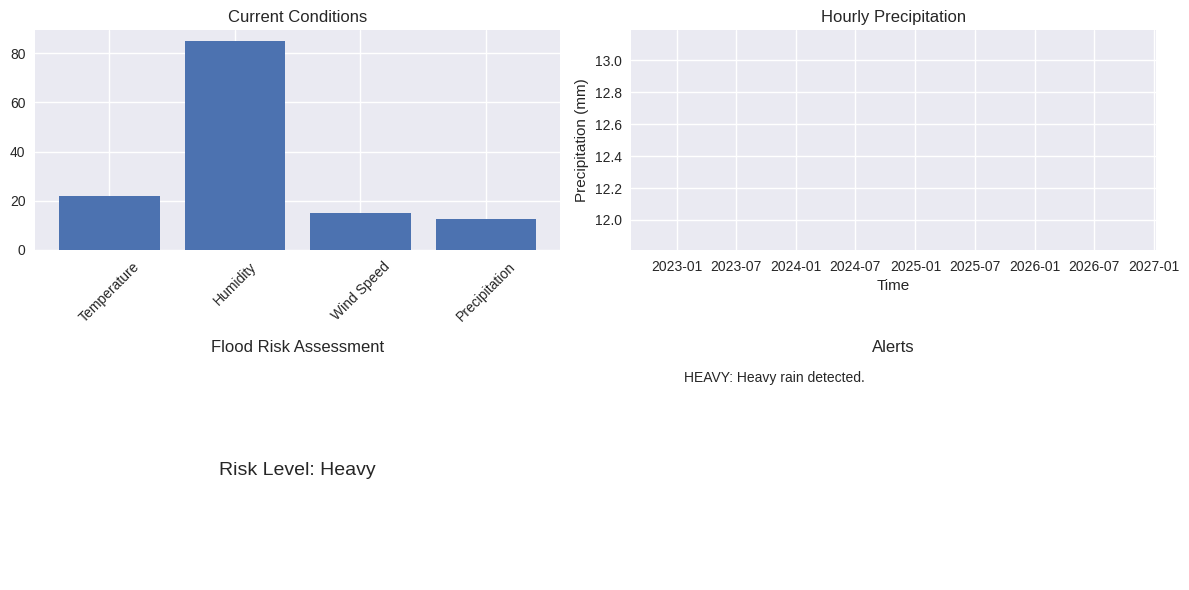

In [37]:
import matplotlib.pyplot as plt

def generate_dashboard(dashboard_data):


    plt.figure(figsize=(12, 6))

    # Current Conditions
    plt.subplot(2, 2, 1)
    plt.title("Current Conditions")
    labels = list(dashboard_data['current_conditions'].keys())[:-1]  # Exclude timestamp
    values = list(dashboard_data['current_conditions'].values())[:-1]
    plt.bar(labels, values)
    plt.xticks(rotation=45)

    # Hourly Data (example: precipitation)
    plt.subplot(2, 2, 2)
    plt.title("Hourly Precipitation")
    hourly_precip = dashboard_data['hourly_data']['Precip']
    plt.plot(hourly_precip.index, hourly_precip.values)
    plt.xlabel("Time")
    plt.ylabel("Precipitation (mm)")


    # Risk Assessment
    plt.subplot(2, 2, 3)
    plt.title("Flood Risk Assessment")
    risk_level = dashboard_data['risk_assessment']['level']
    plt.text(0.5, 0.5, f"Risk Level: {risk_level}", ha='center', va='center', fontsize=14)
    plt.axis('off')  # Turn off axes for text display

    # Alerts
    plt.subplot(2, 2, 4)
    plt.title("Alerts")
    alerts = dashboard_data['alerts']
    for i, alert in enumerate(alerts):
      plt.text(0.1, 0.9 - i * 0.1, f"{alert['level'].upper()}: {alert['message']}", fontsize=10)
    plt.axis('off')


    plt.tight_layout()
    plt.show()


# Example usage (assuming dashboard_data is available)
generate_dashboard(dashboard_data)

Saving modified_flood_dataset.csv to modified_flood_dataset.csv


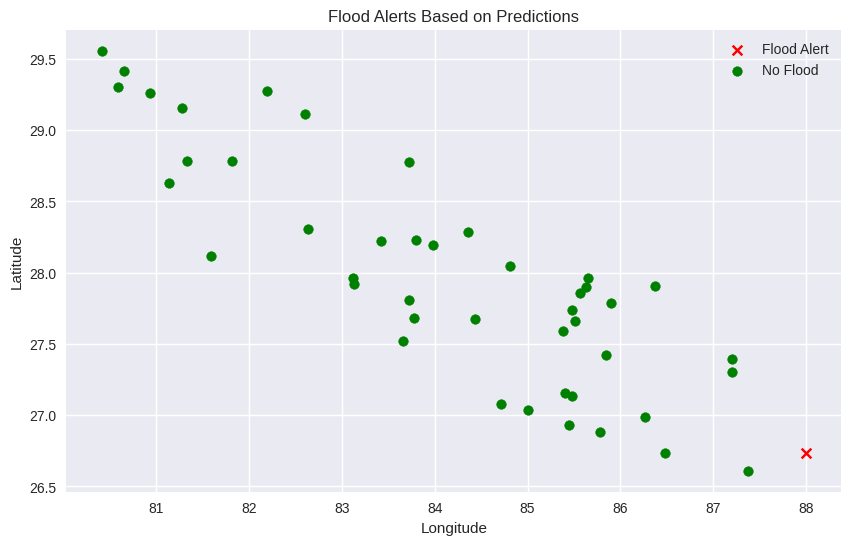

In [38]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Upload the file manually or by providing a path if already present
uploaded = files.upload()

# Step 2: Load the test data
test_data = pd.read_csv('modified_flood_dataset.csv')  # Replace with the correct filename if necessary

test_data = test_data.dropna(subset=['Value'])


# test_data['Value'] = test_data['Value'].fillna(test_data['Value'].mean())

X = test_data.drop(['Value'], axis=1)
y = test_data['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create a scatter plot to visualize flood alerts based on geographical location
plt.figure(figsize=(10, 6))

# Plot areas with predicted floods
# Instead of using test_data directly, use X_test which corresponds to y_pred
flood_areas = X_test[y_pred == 1]  # Use X_test here
no_flood_areas = X_test[y_pred == 0] # Use X_test here

# Access Longitude and Latitude from X_test
plt.scatter(flood_areas['Longitude'], flood_areas['Latitude'], color='red', label='Flood Alert', marker='x')
plt.scatter(no_flood_areas['Longitude'], no_flood_areas['Latitude'], color='green', label='No Flood', marker='o')

plt.title('Flood Alerts Based on Predictions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
test_data.head(20)

,Longitude,Latitude,Value,basin_area,soil_saturation,slope_gradient,imperviousness,antecedent_rainfall,return_period
0,80.599000,29.159000,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
1,86.232114,27.630447,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
2,86.210000,26.650000,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
3,87.902500,26.813300,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
4,82.390795,28.015945,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
5,82.729186,28.247219,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
6,85.431115,27.750066,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
7,80.223685,28.938294,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
8,86.878376,26.764039,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2
9,88.001003,26.731641,1.0,87.454012,0.950000,3.927976,77.959755,220.000000,2


In [65]:
# Filter data where 'Value' is greater than or equal to 19
filtered_data = test_data[test_data['Value'] == 0]

# Convert the filtered data to a dictionary
# 'orient=records' will give us a list of dictionaries
green = filtered_data[['Longitude', 'Latitude', 'Value']].to_dict(orient='records')

# Display the filtered dictionary
print(green)



[{'Longitude': 81.91056944, 'Latitude': 29.20060556, 'Value': 0.0}, {'Longitude': 86.61385, 'Latitude': 26.896269, 'Value': 0.0}, {'Longitude': 83.729894, 'Latitude': 28.784025, 'Value': 0.0}, {'Longitude': 86.193569, 'Latitude': 27.756831, 'Value': 0.0}, {'Longitude': 83.72083, 'Latitude': 28.779846, 'Value': 0.0}, {'Longitude': 82.19415, 'Latitude': 29.27396667, 'Value': 0.0}, {'Longitude': 82.818543, 'Latitude': 28.986586, 'Value': 0.0}, {'Longitude': 85.0012, 'Latitude': 27.0354, 'Value': 0.0}, {'Longitude': 85.917228, 'Latitude': 26.709665, 'Value': 0.0}, {'Longitude': 85.937818, 'Latitude': 27.070204, 'Value': 0.0}, {'Longitude': 87.874507, 'Latitude': 26.686394, 'Value': 0.0}, {'Longitude': 88.078, 'Latitude': 26.868, 'Value': 0.0}, {'Longitude': 85.363756, 'Latitude': 27.7405709, 'Value': 0.0}, {'Longitude': 83.74819722, 'Latitude': 28.17726667, 'Value': 0.0}, {'Longitude': 85.484083, 'Latitude': 27.133046, 'Value': 0.0}, {'Longitude': 86.713376, 'Latitude': 27.814942, 'Value':

In [ ]:
# Filter data where 'Value' is greater than or equal to 19
filter_data = test_data[test_data['Value'] == 1]

# Convert the filtered data to a dictionary
# 'orient=records' will give us a list of dictionaries
red = filter_data[['Longitude', 'Latitude', 'Value']].to_dict(orient='records')

# Display the filtered dictionary
print(red)

In [68]:
import json

# ... (your existing code to create filter_dict) ...

# Save to a JSON file
with open('green.json', 'w') as f:
    json.dump(green_dict, f, indent=4)  # Use json.dump for Python lists

# Save to a specific location
with open('/content/green.json', 'w') as f:
    json.dump(filter_dict, f, indent=4)

In [62]:
import json

# ... your existing code ...

# Save to a JSON file
with open('filtered_dict.json', 'w') as f:
    json.dump(red, f, indent=4)

# Save to a specific location
with open('/content/red.json', 'w') as f:
    json.dump(filtered_dict, f, indent=4)

In [56]:
with open('red.json', 'w') as json_file:
    json.dump(red, json_file, indent=4)


In [47]:
import json

# Assuming test_data is your loaded DataFrame
red = test_data[['Longitude', 'Latitude', 'Value']]

# Convert to JSON using 'index' orientation
json_data = red.to_json(orient='index')

# Load JSON data into a Python dictionary
data_dict = json.loads(json_data)

# Print JSON data in vertical format
for key, value in data_dict.items():
    print(f"{key}:")
    for inner_key, inner_value in value.items():
        print(f"  {inner_key}: {inner_value}")

# Optionally, save to a JSON file with indentation for better readability
with open('red.json', 'w') as f:
    json.dump(data_dict, f, indent=2)

0:
  Longitude: 80.599
  Latitude: 29.159
  Value: 1.0
1:
  Longitude: 86.23211389
  Latitude: 27.63044722
  Value: 1.0
2:
  Longitude: 86.21
  Latitude: 26.65
  Value: 1.0
3:
  Longitude: 87.9025
  Latitude: 26.8133
  Value: 1.0
4:
  Longitude: 82.390795
  Latitude: 28.015945
  Value: 1.0
5:
  Longitude: 82.72918611
  Latitude: 28.24721944
  Value: 1.0
6:
  Longitude: 85.431115
  Latitude: 27.750066
  Value: 1.0
7:
  Longitude: 80.223685
  Latitude: 28.938294
  Value: 1.0
8:
  Longitude: 86.878376
  Latitude: 26.764039
  Value: 1.0
9:
  Longitude: 88.001003
  Latitude: 26.731641
  Value: 1.0
10:
  Longitude: 85.378889
  Latitude: 27.593056
  Value: 1.0
11:
  Longitude: 81.91056944
  Latitude: 29.20060556
  Value: 0.0
12:
  Longitude: 86.61385
  Latitude: 26.896269
  Value: 0.0
13:
  Longitude: 83.729894
  Latitude: 28.784025
  Value: 0.0
14:
  Longitude: 86.193569
  Latitude: 27.756831
  Value: 0.0
15:
  Longitude: 83.72083
  Latitude: 28.779846
  Value: 0.0
16:
  Longitude: 82.19415


In [54]:
# Assuming test_data is your loaded DataFrame
value_data = test_data[['Longitude', 'Latitude', 'Value']]

# Convert to JSON
json_data = value_data.to_json(orient='records')

# Display JSON
print(json_data)

# Optionally, save to a JSON file
value_data.to_json('value_data.json', orient='records')


[{"Longitude":80.599,"Latitude":29.159,"Value":1.0},{"Longitude":86.23211389,"Latitude":27.63044722,"Value":1.0},{"Longitude":86.21,"Latitude":26.65,"Value":1.0},{"Longitude":87.9025,"Latitude":26.8133,"Value":1.0},{"Longitude":82.390795,"Latitude":28.015945,"Value":1.0},{"Longitude":82.72918611,"Latitude":28.24721944,"Value":1.0},{"Longitude":85.431115,"Latitude":27.750066,"Value":1.0},{"Longitude":80.223685,"Latitude":28.938294,"Value":1.0},{"Longitude":86.878376,"Latitude":26.764039,"Value":1.0},{"Longitude":88.001003,"Latitude":26.731641,"Value":1.0},{"Longitude":85.378889,"Latitude":27.593056,"Value":1.0},{"Longitude":81.91056944,"Latitude":29.20060556,"Value":0.0},{"Longitude":86.61385,"Latitude":26.896269,"Value":0.0},{"Longitude":83.729894,"Latitude":28.784025,"Value":0.0},{"Longitude":86.193569,"Latitude":27.756831,"Value":0.0},{"Longitude":83.72083,"Latitude":28.779846,"Value":0.0},{"Longitude":82.19415,"Latitude":29.27396667,"Value":0.0},{"Longitude":82.818543,"Latitude":28.

In [57]:
# Save to a JSON file
value_data.to_json('value_data.json', orient='records')


In [58]:
# Save to a specific location
value_data.to_json('/content/value_data.json', orient='records')
